In [1]:
import numpy as np
import matplotlib.pyplot as plt
import PIL

In [2]:
import torch
from torch.utils.data import DataLoader
import torchvision

Source: https://pytorch.org/tutorials/beginner/basics/quickstart_tutorial.html

## Image Data Set

In [3]:
data = torchvision.datasets.FashionMNIST(root="data", download=True)

In [4]:
image, tag = data[0]

In [5]:
image

In [6]:
tag

9

In [7]:
image, tag = data[1]

In [8]:
image

In [9]:
tag

0

In [10]:
data.classes # got this from help(data)

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [11]:
data = torchvision.datasets.FashionMNIST(
    root="data",
    download=True,
    target_transform=lambda tag: data.classes[tag],
)

In [12]:
data[0]

(<PIL.Image.Image image mode=L size=28x28>, 'Ankle boot')

In [13]:
data[1]

(<PIL.Image.Image image mode=L size=28x28>, 'T-shirt/top')

In [14]:
data[2]

(<PIL.Image.Image image mode=L size=28x28>, 'T-shirt/top')

In [15]:
image, cls = data[1]

In [16]:
image

In [17]:
image.mode, image.width, image.height, image.size # 8-bit grayscale, see https://pillow.readthedocs.io/en/stable/handbook/concepts.html#modes

('L', 28, 28, (28, 28))

In [18]:
# not required here, matplotlib can consume PIL images directly
image_array = np.array(image)
print(image_array.shape, image_array.dtype)
print(image_array)

(28, 28) uint8
[[  0   0   0   0   0   1   0   0   0   0  41 188 103  54  48  43  87 168
  133  16   0   0   0   0   0   0   0   0]
 [  0   0   0   1   0   0   0  49 136 219 216 228 236 255 255 255 255 217
  215 254 231 160  45   0   0   0   0   0]
 [  0   0   0   0   0  14 176 222 224 212 203 198 196 200 215 204 202 201
  201 201 209 218 224 164   0   0   0   0]
 [  0   0   0   0   0 188 219 200 198 202 198 199 199 201 196 198 198 200
  200 200 200 201 200 225  41   0   0   0]
 [  0   0   0   0  51 219 199 203 203 212 238 248 250 245 249 246 247 252
  248 235 207 203 203 222 140   0   0   0]
 [  0   0   0   0 116 226 206 204 207 204 101  75  47  73  48  50  45  51
   63 113 222 202 206 220 224   0   0   0]
 [  0   0   0   0 200 222 209 203 215 200   0  70  98   0 103  59  68  71
   49   0 219 206 214 210 250  38   0   0]
 [  0   0   0   0 247 218 212 210 215 214   0 254 243 139 255 174 251 255
  205   0 215 217 214 208 220  95   0   0]
 [  0   0   0  45 226 214 214 215 224 205   0  42

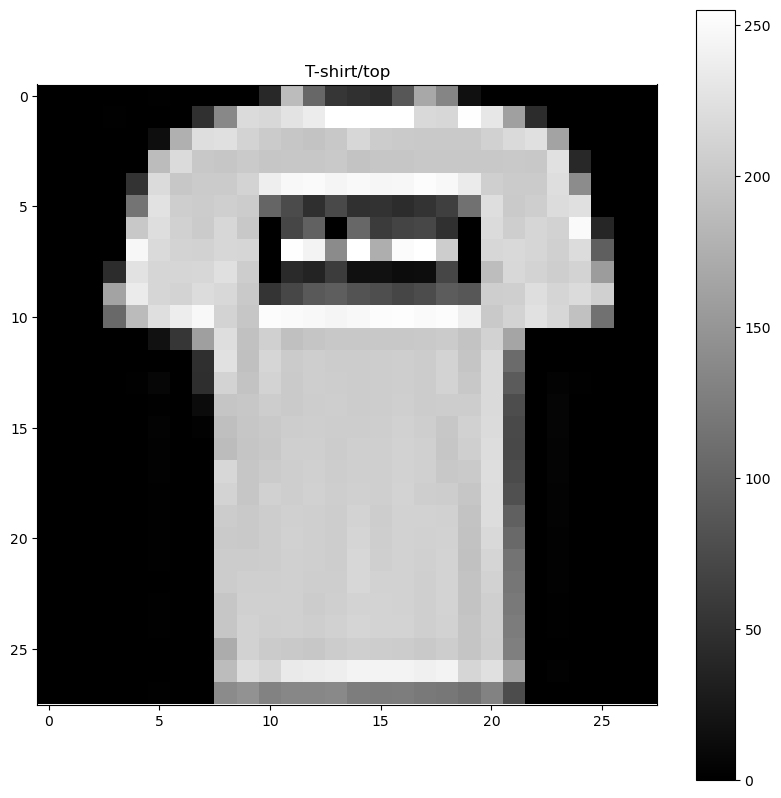

In [19]:
plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.colorbar()
plt.set_cmap("grey")
plt.title(cls)
None

In [20]:
tensor = torch.from_numpy(image_array)

In [21]:
tensor.shape

torch.Size([28, 28])

In [22]:
w, h = tensor.shape
w, h

(28, 28)

In [23]:
tensor.dtype

torch.uint8

In [24]:
tensor[5, 8]

tensor(207, dtype=torch.uint8)

In [25]:
tensor = torchvision.transforms.ToTensor()(image) # Notice strange factory pattern.
# How does this stuff flies when used in datasets transforms?
tensor # Rescaled to [0, 1) (or [0, 1] ?)

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000,
          0.0000, 0.0000, 0.1608, 0.7373, 0.4039, 0.2118, 0.1882, 0.1686,
          0.3412, 0.6588, 0.5216, 0.0627, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0000, 0.1922,
          0.5333, 0.8588, 0.8471, 0.8941, 0.9255, 1.0000, 1.0000, 1.0000,
          1.0000, 0.8510, 0.8431, 0.9961, 0.9059, 0.6275, 0.1765, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0549, 0.6902, 0.8706,
          0.8784, 0.8314, 0.7961, 0.7765, 0.7686, 0.7843, 0.8431, 0.8000,
          0.7922, 0.7882, 0.7882, 0.7882, 0.8196, 0.8549, 0.8784, 0.6431,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.7373, 0.8588, 0.7843,
          0.7765, 0.7922, 0.7765, 0.7804, 0.7804, 0.7882, 0.7686, 0.7765,
          0.7765, 0.7843, 0.7843, 0.7843, 0.7843, 0.7882,

In [26]:
tensor.dtype # half-precision

torch.float32

In [27]:
(image_array / 255)[:2]  # Uhu?

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.00392157, 0.        , 0.        , 0.        , 0.        ,
        0.16078431, 0.7372549 , 0.40392157, 0.21176471, 0.18823529,
        0.16862745, 0.34117647, 0.65882353, 0.52156863, 0.0627451 ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.00392157, 0.        ,
        0.        , 0.        , 0.19215686, 0.53333333, 0.85882353,
        0.84705882, 0.89411765, 0.9254902 , 1.        , 1.        ,
        1.        , 1.        , 0.85098039, 0.84313725, 0.99607843,
        0.90588235, 0.62745098, 0.17647059, 0.        , 0.        ,
        0.        , 0.        , 0.        ]])

In [28]:
tensor.shape # Arf, introduced a batch dimension here
# So they rescale, half-prec and autobatch the stuff.

torch.Size([1, 28, 28])

In [29]:
tensor[0, 0, 5].item()

0.003921568859368563

In [30]:
image_array[0, 5] / 255 # Shit, they map to [0, 1], not [0, 1)

0.00392156862745098

In [31]:
image_array[0, 5] / 256

0.00390625

In [32]:
data = torchvision.datasets.FashionMNIST(
    root="data",
    download=True,
    transform = lambda image: torch.from_numpy(np.array(image) / 256) ,
    target_transform=lambda tag: data.classes[tag],
)

In [33]:
tensor, cls = data[1]

In [34]:
tensor.shape, tensor.dtype

(torch.Size([28, 28]), torch.float64)

In [35]:
tensor[0, 5].item() # better, baby!

0.00390625

In [36]:
tensor

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0000,
         0.0000, 0.1602, 0.7344, 0.4023, 0.2109, 0.1875, 0.1680, 0.3398, 0.6562,
         0.5195, 0.0625, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0000, 0.1914, 0.5312,
         0.8555, 0.8438, 0.8906, 0.9219, 0.9961, 0.9961, 0.9961, 0.9961, 0.8477,
         0.8398, 0.9922, 0.9023, 0.6250, 0.1758, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0547, 0.6875, 0.8672, 0.8750,
         0.8281, 0.7930, 0.7734, 0.7656, 0.7812, 0.8398, 0.7969, 0.7891, 0.7852,
         0.7852, 0.7852, 0.8164, 0.8516, 0.8750, 0.6406, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.7344, 0.8555, 0.7812, 0.7734,
         0.7891, 0.7734, 0.7773, 0.7773, 0.7852, 0.7656, 0.7734, 0.7734, 0.7812,
         0.7812, 0.7812, 0.7812, 0.7852, 0.7812, 0.8789

In [37]:
data = torchvision.datasets.FashionMNIST(
    root="data",
    download=True,
    transform = torchvision.transforms.ToTensor(), # OK, fine, we instantiate, I get that now.
)

In [38]:
# Nota: to emulate ToTensor:
def T(image):
    array = np.asarray(np.array(image) / 255, dtype=np.float32)
    w, h = array.shape
    t = np.reshape(array, (1, 28, 28))
    return torch.from_numpy(t)
T(image)

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000,
          0.0000, 0.0000, 0.1608, 0.7373, 0.4039, 0.2118, 0.1882, 0.1686,
          0.3412, 0.6588, 0.5216, 0.0627, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0000, 0.1922,
          0.5333, 0.8588, 0.8471, 0.8941, 0.9255, 1.0000, 1.0000, 1.0000,
          1.0000, 0.8510, 0.8431, 0.9961, 0.9059, 0.6275, 0.1765, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0549, 0.6902, 0.8706,
          0.8784, 0.8314, 0.7961, 0.7765, 0.7686, 0.7843, 0.8431, 0.8000,
          0.7922, 0.7882, 0.7882, 0.7882, 0.8196, 0.8549, 0.8784, 0.6431,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.7373, 0.8588, 0.7843,
          0.7765, 0.7922, 0.7765, 0.7804, 0.7804, 0.7882, 0.7686, 0.7765,
          0.7765, 0.7843, 0.7843, 0.7843, 0.7843, 0.7882,

In [39]:
data = torchvision.datasets.FashionMNIST(
    root="data",
    download=True,
    transform=T,
)

## Data Loader

In [40]:
dl = torch.utils.data.DataLoader(data, batch_size=64, shuffle=True)

In [41]:
len(dl)

938

In [42]:
len(data) / 64

937.5

In [43]:
batch = next(iter(dl))

In [44]:
type(batch)

list

In [45]:
len(batch)

2

In [46]:
batch[1]

tensor([8, 8, 7, 0, 0, 7, 3, 4, 0, 2, 1, 8, 6, 0, 2, 8, 9, 9, 6, 3, 0, 4, 5, 7,
        2, 4, 6, 1, 1, 5, 7, 3, 9, 0, 6, 4, 2, 1, 2, 8, 9, 0, 8, 1, 5, 4, 6, 7,
        5, 5, 2, 8, 6, 3, 2, 2, 6, 1, 9, 5, 5, 5, 2, 5])

In [47]:
batch[0].shape

torch.Size([64, 1, 28, 28])

In [48]:
n = len(data.classes)
def one_hot(i):
    t = torch.zeros(n)
    t[i] = 1.0
    return t
data = torchvision.datasets.FashionMNIST(
    root="data", 
    transform = torchvision.transforms.ToTensor(),
    target_transform = one_hot)

In [49]:
data[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [50]:
data[1]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000,
           0.0000, 0.0000, 0.1608, 0.7373, 0.4039, 0.2118, 0.1882, 0.1686,
           0.3412, 0.6588, 0.5216, 0.0627, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0000, 0.1922,
           0.5333, 0.8588, 0.8471, 0.8941, 0.9255, 1.0000, 1.0000, 1.0000,
           1.0000, 0.8510, 0.8431, 0.9961, 0.9059, 0.6275, 0.1765, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0549, 0.6902, 0.8706,
           0.8784, 0.8314, 0.7961, 0.7765, 0.7686, 0.7843, 0.8431, 0.8000,
           0.7922, 0.7882, 0.7882, 0.7882, 0.8196, 0.8549, 0.8784, 0.6431,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.7373, 0.8588, 0.7843,
           0.7765, 0.7922, 0.7765, 0.7804, 0.7804, 0.7882, 0.7686, 0.7765,
           0.7765, 0.7843, 0.7843, 0.7843, 

In [51]:
dl = torch.utils.data.DataLoader(data, batch_size=12)

In [52]:
it = iter(dl)
first_batch = next(it)

In [53]:
first_batch

[tensor([[[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           ...,
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]]],
 
 
         [[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           ...,
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]]],
 
 
         [[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000

## Neural Network

In [54]:
import torch.nn as nn

class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        flat_x = self.flatten(x)
        logits = self.linear_relu_stack(flat_x)
        return self.softmax(logits)

In [55]:
model = NeuralNetwork()
model

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
  (softmax): Softmax(dim=1)
)

In [56]:
dict(model.named_parameters()).keys()

dict_keys(['linear_relu_stack.0.weight', 'linear_relu_stack.0.bias', 'linear_relu_stack.2.weight', 'linear_relu_stack.2.bias', 'linear_relu_stack.4.weight', 'linear_relu_stack.4.bias'])

In [57]:
model.flatten

Flatten(start_dim=1, end_dim=-1)

In [58]:
model.linear_relu_stack[0]

Linear(in_features=784, out_features=512, bias=True)

In [59]:
input_batch, output_batch = first_batch
input, output = input_batch[0], output_batch[0]
model(input)

tensor([[0.1007, 0.0970, 0.0988, 0.1058, 0.0991, 0.0976, 0.1009, 0.1000, 0.0974,
         0.1027]], grad_fn=<SoftmaxBackward0>)

In [60]:
import torch.nn as nn

model_flat = nn.Sequential(
    nn.Flatten(),
    nn.Linear(28*28, 512),
    nn.ReLU(),
    nn.Linear(512, 512),
    nn.ReLU(),
    nn.Linear(512, 10),
    nn.Softmax(1)
)

model_flat(input)

tensor([[0.1027, 0.0981, 0.1026, 0.1075, 0.0862, 0.1034, 0.1046, 0.1091, 0.0892,
         0.0968]], grad_fn=<SoftmaxBackward0>)

nn.Flatten() flattens all non-batch dimensions by default (this is configurable)

In [61]:
f = nn.Flatten()
t = torch.rand(12, 3, 3)
f(t).shape

torch.Size([12, 9])

In [62]:
relu = nn.ReLU()
relu(torch.tensor(5.9))

tensor(5.9000)

In [63]:
relu(torch.tensor(-5.9))

tensor(0.)

In [64]:
relu(torch.rand(5, 5) - 0.5)

tensor([[0.0000, 0.1909, 0.2156, 0.0000, 0.0000],
        [0.0000, 0.4510, 0.1845, 0.0000, 0.2702],
        [0.0583, 0.4468, 0.1903, 0.3534, 0.0000],
        [0.2690, 0.3841, 0.0000, 0.4390, 0.3221],
        [0.3070, 0.2159, 0.3076, 0.0000, 0.0000]])

In [65]:
l = nn.Linear(3, 2)

In [66]:
list(l.parameters())

[Parameter containing:
 tensor([[-0.1606,  0.2090,  0.4971],
         [ 0.3641, -0.0012, -0.2370]], requires_grad=True),
 Parameter containing:
 tensor([ 0.4366, -0.2593], requires_grad=True)]

In [67]:
list(l.named_parameters())

[('weight',
  Parameter containing:
  tensor([[-0.1606,  0.2090,  0.4971],
          [ 0.3641, -0.0012, -0.2370]], requires_grad=True)),
 ('bias',
  Parameter containing:
  tensor([ 0.4366, -0.2593], requires_grad=True))]

In [68]:
l.weight # 2 lines, 3 columns ; Linear POST-MULTIPLIES the TRANSPOSE of the weights.
# Which is exactly what we need to read dim. compat left to right and to support batch
# data seamlessly.

Parameter containing:
tensor([[-0.1606,  0.2090,  0.4971],
        [ 0.3641, -0.0012, -0.2370]], requires_grad=True)

In [69]:
l.bias

Parameter containing:
tensor([ 0.4366, -0.2593], requires_grad=True)

In [70]:
l(torch.rand(3))

tensor([ 0.6465, -0.0737], grad_fn=<ViewBackward0>)

In [71]:
l(torch.rand(12, 2, 3))

tensor([[[ 0.4248, -0.1361],
         [ 0.6366, -0.0980]],

        [[ 0.3680,  0.0510],
         [ 0.7251, -0.1159]],

        [[ 0.5886, -0.1479],
         [ 0.5766, -0.1112]],

        [[ 0.6050, -0.2000],
         [ 0.3954,  0.0855]],

        [[ 0.8568, -0.3047],
         [ 0.7467, -0.3458]],

        [[ 0.5895, -0.0126],
         [ 0.4844, -0.0824]],

        [[ 0.7865, -0.1523],
         [ 0.7413, -0.1458]],

        [[ 0.5265, -0.2041],
         [ 0.9954, -0.4700]],

        [[ 0.7931, -0.2298],
         [ 0.5036, -0.1326]],

        [[ 0.6212, -0.2582],
         [ 0.9505, -0.4163]],

        [[ 0.6816, -0.1302],
         [ 0.6859, -0.3056]],

        [[ 0.7864, -0.1903],
         [ 0.9314, -0.1865]]], grad_fn=<ViewBackward0>)

In [72]:
torch.nn.Softmax(dim=1)

Softmax(dim=1)

In [73]:
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
  (softmax): Softmax(dim=1)
)


## Device

In [74]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)

In [75]:
device

'cpu'

In [76]:
torch.cuda.is_available()

False

In [77]:
torch.cuda.device_count()

0

Troubleshooting: 

  - <https://saturncloud.io/blog/pytorch-says-that-cuda-is-not-available-troubleshooting-guide-for-data-scientists/>

  - <https://github.com/conda/conda/issues/7757>

Dropping the issue for now.

In [78]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2023 NVIDIA Corporation
Built on Wed_Nov_22_10:17:15_PST_2023
Cuda compilation tools, release 12.3, V12.3.107
Build cuda_12.3.r12.3/compiler.33567101_0


In [79]:
!which nvcc

/home/boisgera/VOYAGER/SANDBOX/pytorch/.pixi/env/bin/nvcc


In [80]:
print(torch.version.cuda) ### WHOOT?

None


In [81]:
!echo $CUDA_HOME

In [82]:
!echo $LD_LIBRARY_PATH

In [83]:
!echo $PATH

/home/boisgera/VOYAGER/SANDBOX/pytorch/.pixi/env/bin:/home/boisgera/.local/share/reflex/bun/bin:/home/boisgera/.deno/bin:/home/boisgera/miniconda3/condabin:/home/boisgera/.local/share/pnpm:/home/boisgera/.local/node-v20.10.0-linux-x64/bin:/home/boisgera/.local/nu-0.85.0-x86_64-unknown-linux-gnu:/home/boisgera/.pixi/bin:/home/boisgera/.local/zig-linux-x86_64-0.12.0-dev.1849+bb0f7d55e:/home/boisgera/.mix/escripts:/home/boisgera/.local/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/usr/games:/usr/local/games:/snap/bin:/usr/local/go/bin:/home/boisgera/go/bin


## Autograd

Issue? There are ways to perform higher-order diff but I can define a custom Function for which only the 1st order gradient is known. Does it break in this specific case?

In [84]:
torch.autograd.Function

torch.autograd.function.Function

In [85]:
isinstance(torch.sin, torch.autograd.Function)

False

In [86]:
# Nota: Function to be used only for custom autodiffable functions?

In [87]:
u = torch.tensor(data=0.0)

In [88]:
y = torch.sin(u)

In [89]:
y

tensor(0.)

In [90]:
u.requires_grad = True

In [91]:
y = torch.sin(u)

In [92]:
y.backward()

In [93]:
u.grad

tensor(1.)

In [94]:
# y.backward() # Error: can't redo the stuff by default.

In [95]:
y = torch.sin(u)

In [96]:
y.backward()

In [97]:
u.grad # Accumulation by default !

tensor(2.)

In [98]:
u.grad.data.zero_()

tensor(0.)

In [99]:
y = torch.sin(u); y.backward(); u.grad

tensor(1.)

## Optimization

In [100]:
import torch.nn as nn

class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        flat_x = self.flatten(x)
        logits = self.linear_relu_stack(flat_x)
        return logits

loss_fn = nn.CrossEntropyLoss()

In [101]:
n = len(data.classes)
def one_hot(i):
    t = torch.zeros(n)
    t[i] = 1.0
    return t
data = torchvision.datasets.FashionMNIST(
    root="data", 
    download=True,
    transform = torchvision.transforms.ToTensor(),
    target_transform = one_hot)

In [102]:
from torch.utils.data import DataLoader

In [113]:

model = NeuralNetwork()
model.train()

optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

def train_loop():
    global loss
    for (X, y) in DataLoader(data, batch_size=16, shuffle=True):
        y_hat = model(X)
        loss = loss_fn(y_hat, y)
        #print(loss)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

def test():
    model.eval()
    dlt = DataLoader(test_data)
    softmax = nn.Softmax(dim=0)
    correct = 0
    total = 0
    with torch.no_grad():
        for (X, y) in dlt:
            y = y.flatten()
            y_hat = softmax(model(X).flatten())
            if torch.argmax(y, dim=0) == torch.argmax(y_hat):
                correct += 1
            total += 1
    return float(correct) / total * 100

test_data = torchvision.datasets.FashionMNIST(root="data", train=False, transform=torchvision.transforms.ToTensor(), target_transform=one_hot)

for i in range(100):
    train_loop()
    print(i, loss.item(), test())


0 0.30844712257385254 85.09
1 0.5057268142700195 84.56
2 0.2397308051586151 85.88
3 0.08154617249965668 85.71
4 0.14793848991394043 87.83
5 0.658316433429718 88.03
6 0.36564984917640686 87.64999999999999
7 0.11406360566616058 87.72999999999999
8 0.5189980268478394 88.11
9 0.2375897616147995 87.79
10 0.15980102121829987 88.0
11 0.13362696766853333 88.21
12 0.10671576857566833 89.32
13 0.15041127800941467 87.63
14 0.047135129570961 88.57000000000001
15 0.1012985035777092 89.28
16 0.11787042766809464 89.2
17 0.1104278415441513 88.48
18 0.012649803422391415 89.09
19 0.28339678049087524 89.25999999999999
20 0.10705923289060593 89.36
21 0.09339811652898788 88.64999999999999
22 0.02172182872891426 89.44
23 0.10261378437280655 88.53999999999999
24 0.11417552083730698 88.91
25 0.3134489953517914 88.46000000000001
26 0.03271772712469101 88.55
27 0.1285117119550705 89.05
28 0.17694130539894104 89.86
29 0.08480900526046753 88.66000000000001
30 0.11245635151863098 87.9
31 0.051166437566280365 89.23